# CHBE 263 Python Assignment

Here are a few basic packages that we will make use of later.



In [149]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
import pandas as pd

## Pipetting Pracitce Analysis


In [94]:
DENSITY_W = 0.9979

TARGET_1 = 1

TARGET_2 = 5

def avg(arr): 
    return sum(arr)/len(arr)

mass_data = pd.read_csv('data/O_Lab_Data.csv')


print("Average Volume of Measurements P1000 targetting 1mL:", round(avg(mass_data.P1000_1ml)/DENSITY_W, 4), "mL")
print("Accuracy of Measurements:", round((avg(mass_data.P1000_1ml)/DENSITY_W-TARGET_1)*100,2), "% error")
print("Standard Deviation of Measurements", round(np.std(mass_data.P1000_1ml/DENSITY_W, ddof=1), 4), "mL")
print("The relative standard deviation of Measurements", round(np.std(mass_data.P1000_1ml/DENSITY_W, ddof=1)/TARGET_1*100, 2), "%")



Average Volume of Measurements P1000 targetting 1mL: 1.0053 mL
Accuracy of Measurements: 0.53 % error
Standard Deviation of Measurements 0.0022 mL
The relative standard deviation of Measurements 0.22 %


## Spectrophotometry

<generator object <genexpr> at 0x11ef4e190>
Slope (m): 0.027572566371681415


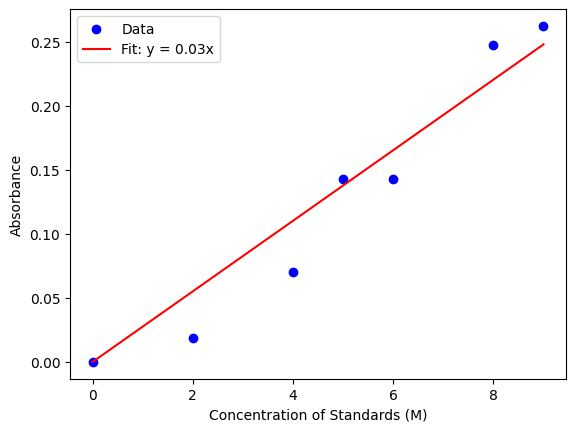

In [153]:
spectro_data = pd.read_csv('data/Collected_Spectro_Data.csv')

all_data = []

for i  in range(len(spectro_data.columns)-1):
    data = {
        "Concentration": float(spectro_data.iloc[i, 0]),  
        "Absorbance": spectro_data.iloc[:, i+1].dropna(),
        "Average Absorbance": avg(spectro_data.iloc[:, i+1].dropna())
    }
    all_data.append(data)
    
data_adjust = avg(all_data[0].get("Absorbance"))

print(dataset["Concentration"] for dataset in all_data)


concentrations = np.array([])
avg_aus = np.array([])

for dataset in all_data:
    dataset["Average Absorbance"] -= data_adjust
    avg_aus = np.append(avg_aus, dataset["Average Absorbance"]) 
    concentrations = np.append(concentrations, dataset["Concentration"])

m = np.sum(concentrations * avg_aus) / np.sum(concentrations**2)  # Calculate slope (m)

# Generate predictions
au = m * x

# Print results
print(f"Slope (m): {m}")

# Plot data and regression line
plt.scatter(concentrations, avg_aus, color='blue', label='Data')
plt.plot(concentrations, au, color='red', label=f'Fit: y = {m:.2f}x')
plt.xlabel('Concentration of Standards (M)')
plt.ylabel('Absorbance')
plt.legend()
plt.show()

